In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
file_path = '/content/delhiaqi.csv'
data = pd.read_csv(file_path)

In [ ]:
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19  


In [ ]:
print("\n General information :")
print(data.info())


 General information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB
None


In [ ]:
print(data.describe())

                 co          no         no2          o3         so2  \
count    561.000000  561.000000  561.000000  561.000000  561.000000   
mean    3814.942210   51.181979   75.292496   30.141943   64.655936   
std     3227.744681   83.904476   42.473791   39.979405   61.073080   
min      654.220000    0.000000   13.370000    0.000000    5.250000   
25%     1708.980000    3.380000   44.550000    0.070000   28.130000   
50%     2590.180000   13.300000   63.750000   11.800000   47.210000   
75%     4432.680000   59.010000   97.330000   47.210000   77.250000   
max    16876.220000  425.580000  263.210000  164.510000  511.170000   

             pm2_5         pm10         nh3  
count   561.000000   561.000000  561.000000  
mean    358.256364   420.988414   26.425062  
std     227.359117   271.287026   36.563094  
min      60.100000    69.080000    0.630000  
25%     204.450000   240.900000    8.230000  
50%     301.170000   340.900000   14.820000  
75%     416.650000   482.570000   26.3

In [ ]:
print(data.isnull().sum())

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [ ]:
data_cleaned = data.dropna()

In [ ]:
print(data.isnull().sum())

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [ ]:
if 'date' in data_cleaned.columns:
    data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

In [ ]:
print(data.columns)

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')


In [ ]:
aqi_column = 'AQI'

In [ ]:
def calculate_aqi(pm25, pm10):
    # Simple logic to combine PM2.5 and PM10 into an AQI value
    aqi_pm25 = pm25
    aqi_pm10 = pm10
    aqi = max(aqi_pm25, aqi_pm10)
    return aqi


In [ ]:
data_cleaned['AQI'] = data_cleaned.apply(lambda row: calculate_aqi(row['pm2_5'], row['pm10']), axis=1)

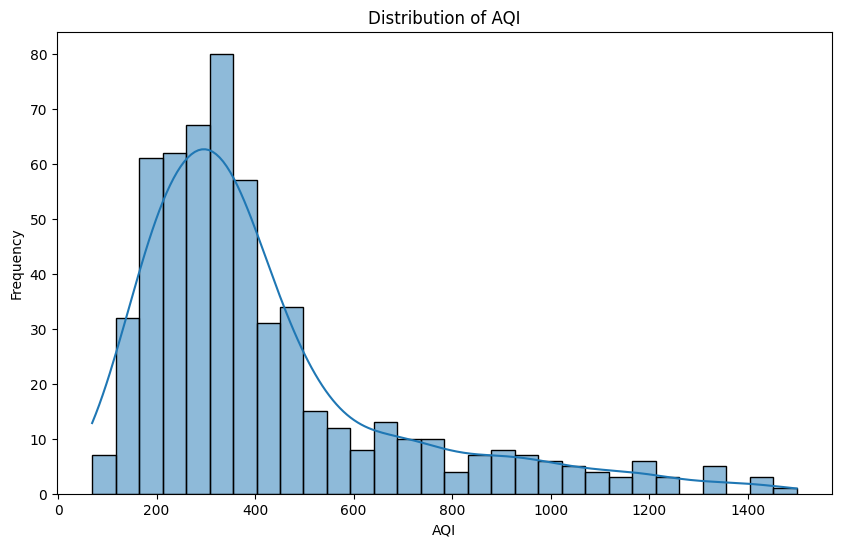

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['AQI'], bins=30, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


In [ ]:
data_cleaned['month'] = data_cleaned['date'].dt.month
data_cleaned['season'] = data_cleaned['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Summer' if x in [3, 4, 5] else ('Monsoon' if x in [6, 7, 8] else 'Post-Monsoon')))


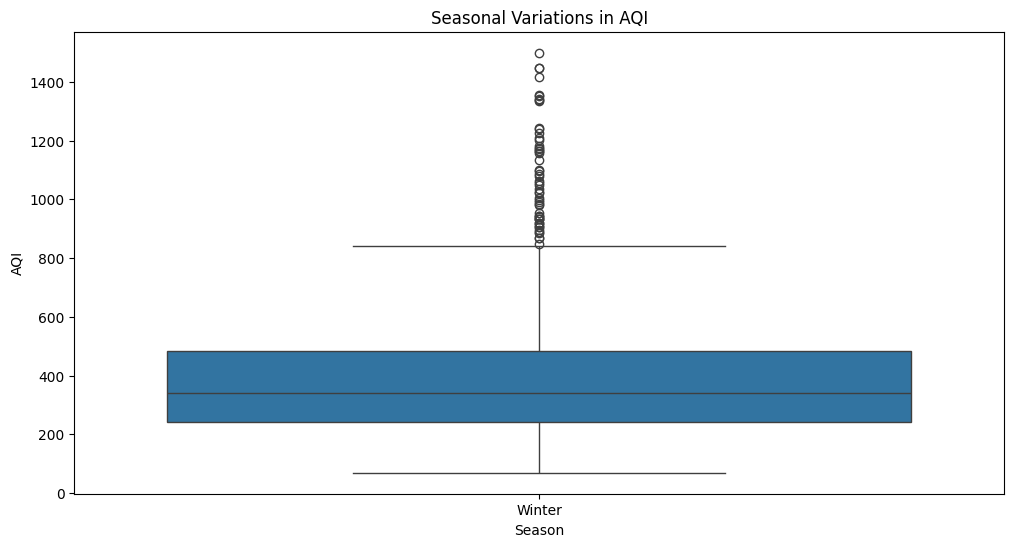

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='AQI', data=data_cleaned)
plt.title('Seasonal Variations in AQI')
plt.xlabel('Season')
plt.ylabel('AQI')
plt.show()

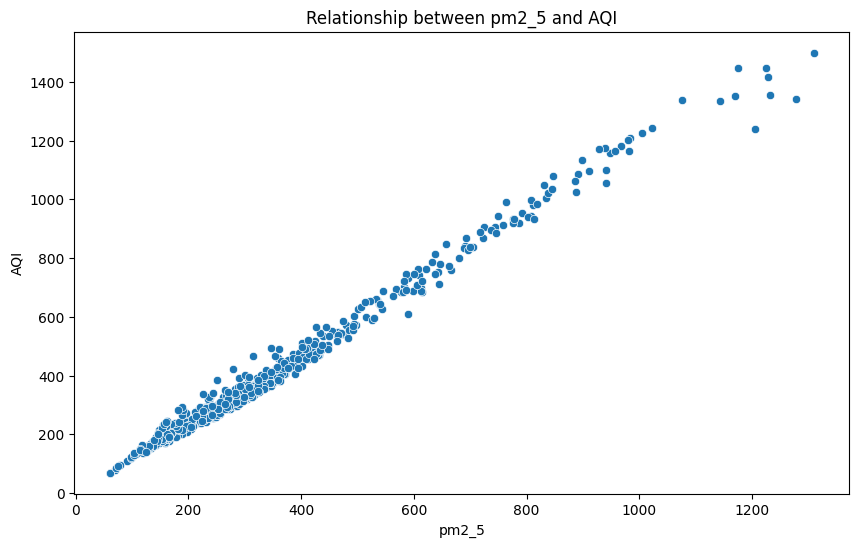

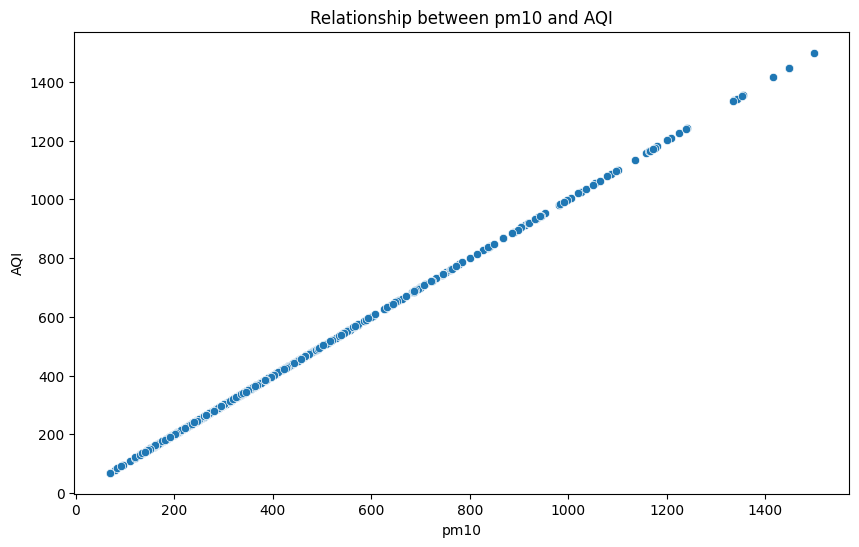

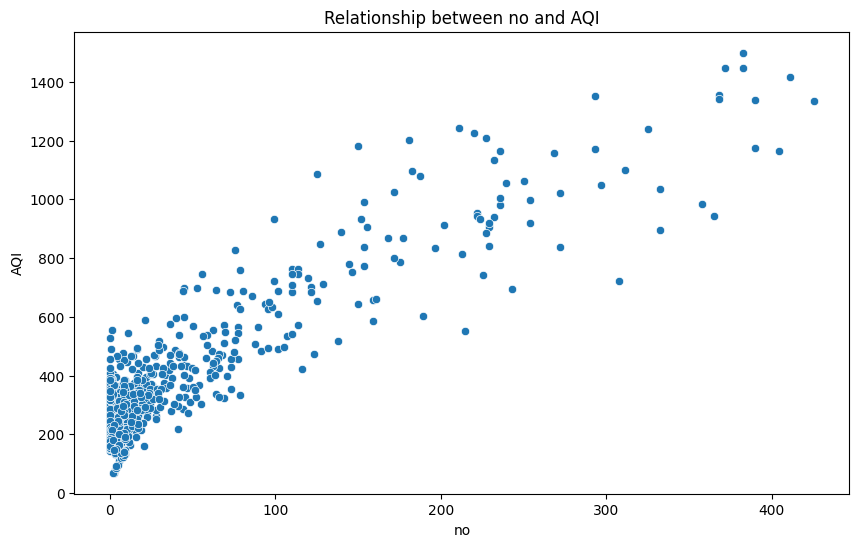

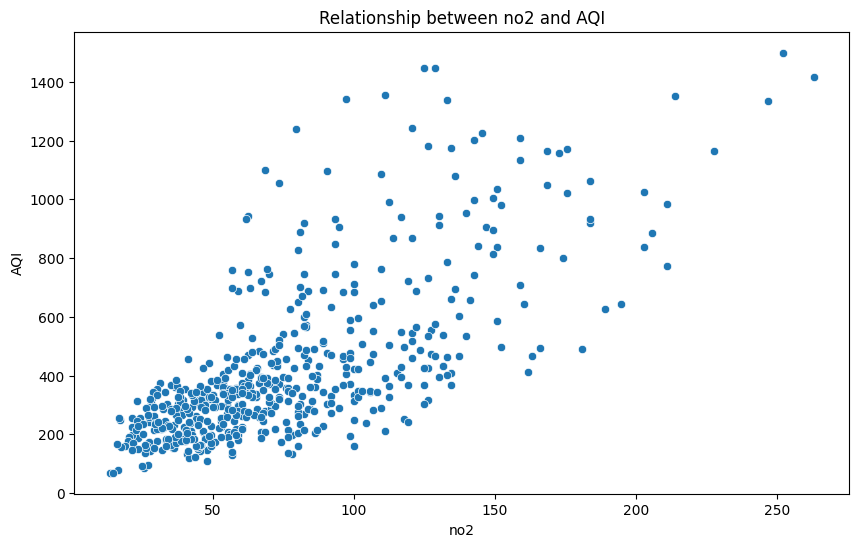

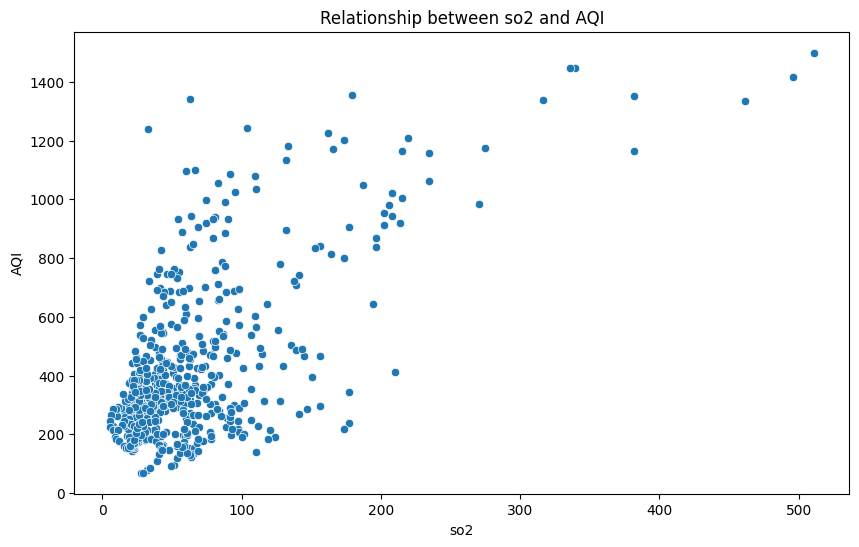

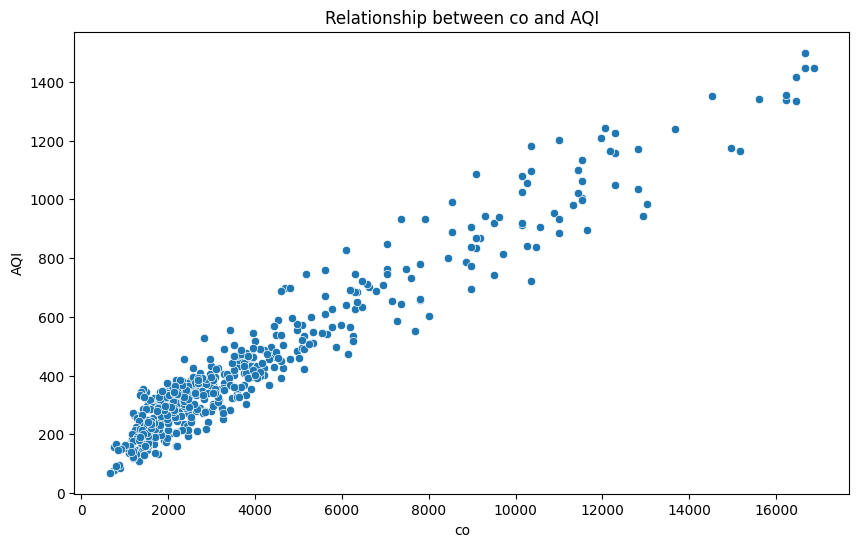

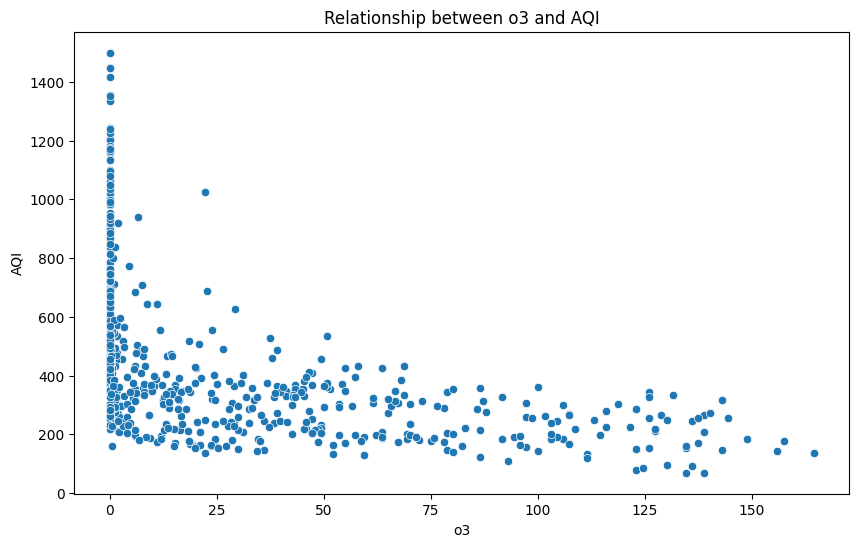

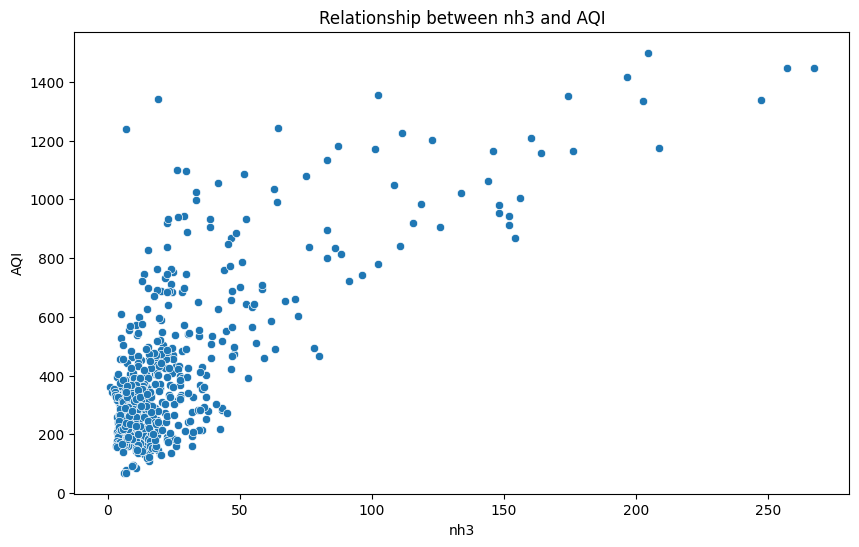

In [ ]:
pollutants = ['pm2_5', 'pm10', 'no', 'no2', 'so2', 'co', 'o3', 'nh3']
for pollutant in pollutants:
    if pollutant in data_cleaned.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=pollutant, y='AQI', data=data_cleaned)
        plt.title(f'Relationship between {pollutant} and AQI')
        plt.xlabel(pollutant)
        plt.ylabel('AQI')
        plt.show()

In [ ]:
numeric_data = data_cleaned.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()


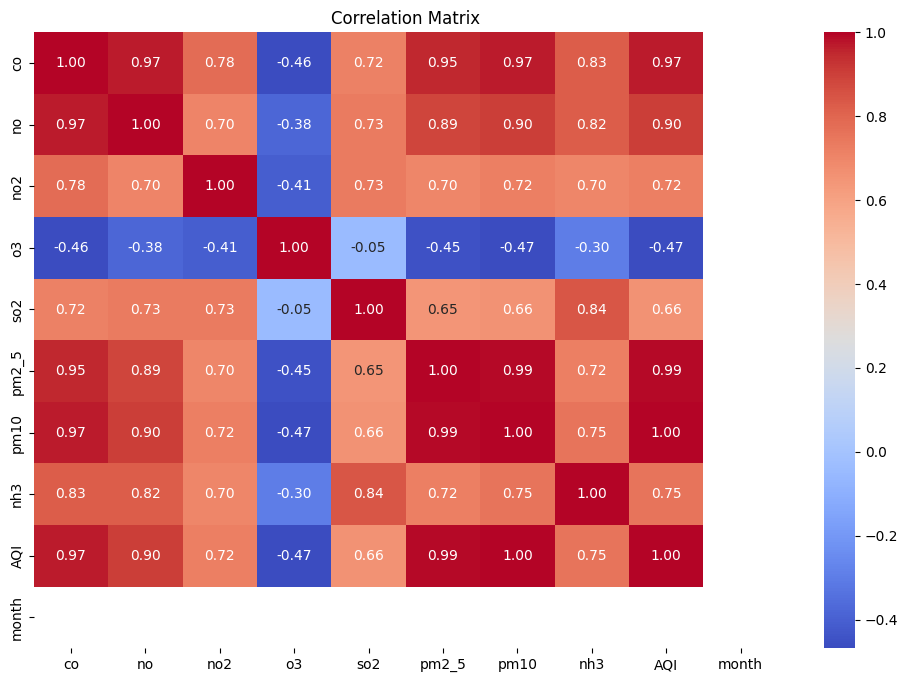

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print("\nSummary and Recommendations:")
print("1. Key Pollutants: PM2.5 and PM10 -> Important pollutants affecting AQI levels in Delhi.")
print("2. Seasonal Variations: AQI levels are highest during the winter season and lowest during the monsoon season.")
print("3. Geographical Factors: Further analysis is needed to understand the impact of geographical factors on AQI. Consider using spatial data for a more detailed study.")

print("Recommendations:")
print("1. Implement stricter regulations on industrial emissions and vehicular pollution, especially focusing on PM2.5 and PM10.")
print("2. Promote the use of public transportation and electric vehicles to reduce traffic-related pollution.")
print("3. Increase green cover and promote urban forestry to help mitigate air pollution.")
print("4. Conduct regular air quality monitoring and raise public awareness about the health impacts of poor air quality.")


Summary and Recommendations:
1. Key Pollutants: PM2.5 and PM10 -> Important pollutants affecting AQI levels in Delhi.
2. Seasonal Variations: AQI levels are highest during the winter season and lowest during the monsoon season.
3. Geographical Factors: Further analysis is needed to understand the impact of geographical factors on AQI. Consider using spatial data for a more detailed study.
Recommendations:
1. Implement stricter regulations on industrial emissions and vehicular pollution, especially focusing on PM2.5 and PM10.
2. Promote the use of public transportation and electric vehicles to reduce traffic-related pollution.
3. Increase green cover and promote urban forestry to help mitigate air pollution.
4. Conduct regular air quality monitoring and raise public awareness about the health impacts of poor air quality.
